# 2.0 - Problem

A parachutist of mass 60 kg jumps out of the stationary air baloon. The upward drag force due to air resistance is proportional to the square of the velocity $$F_D=-b\upsilon^2$$
where b is a drag coefficient (kg/m). The drag coefficient is $b = 0.2 \mbox{ kg/m.}$

## 2.1
Using Newton's second law, the differential equation for $\upsilon$ can be obtained:$$\sum{\vec{F}}=m\vec{a}$$ $$\sum{\vec{F}}=\vec{F_g}+\vec{F_D}$$
where $F_g=mg$.
Because $\displaystyle a=\frac{d\upsilon}{dt}$, the above equation can be rewritten as the following differential equation:
$$m\frac{d\upsilon}{dt}=mg-b\upsilon^2 \tag{2.1}$$

## 2.2
The analytical solution for (2.1) can be obtained:
$$m\frac{d\upsilon}{dt}=mg-b\upsilon^2$$
$$\frac{d\upsilon}{dt}=g-\frac{b}{m}\upsilon^2$$
$$\frac{d\upsilon}{g-\frac{b}{m}\upsilon^2}=dt$$
Using reduction formula $\displaystyle \int\frac{du}{a^2-u^2}=\frac{1}{a}\tanh^{-1}{\left(\frac{u}{a}\right)}+C$,

the following final formula for velocity as a function of time can be obtained:
$$\upsilon(t)=\sqrt{\frac{mg}{b}}\tanh{\left(\sqrt{\frac{gb}{m}}t\right)} \tag{2.2}$$

## 2.3
The terminal velocity's($\upsilon_{\tau}$) expression can be achieved when the time variable tends to approach infinity:
$$\upsilon_{\tau}=\lim_{t\to\infty}{\upsilon(t)}=\sqrt{\frac{mg}{b}}\lim_{t\to\infty}{\left[\tanh{\left(\sqrt{\frac{gb}{m}}t\right)}\right]}$$
As hyperbolic tangent function of x appoaches 1 as x approaches infinity, $\tanh(x)\to 1\mbox{ as }x\to\infty$, the expression for terminal velocity has a finite value:
$$\upsilon_{\tau}=\sqrt{\frac{mg}{b}} \tag{2.3}$$

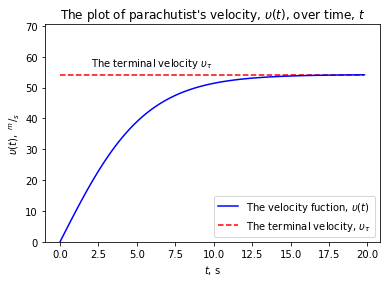

In [1]:
#2.4
import matplotlib.pyplot as plt
%matplotlib inline
m=60 #the parachutist's mass, in kg
g=9.80665 #the conventional value of gravitational acceleration
b=.2 #the drag coefficient, in kg/m
#Let's import numpy for array manipulation
import numpy as np

t=np.arange(0,20,.2)

def func_vel(time,m,b):
    return ((m*g/b)**.5*np.tanh((g*b/m)**.5*time))
    #use the derived formula (2.2) for analytic(exact theoretical) data
v_t=(m*g/b)**.5
plt.text(2,v_t*1.05,r"The terminal velocity $\upsilon_{\tau}$")
plt.ylim(0,v_t*1.3)
plt.title(r"The plot of parachutist's velocity, $\upsilon(t)$, over time, $t$")
plt.hlines(v_t, min(t), max(t), colors='r', linestyles='--', label=r'The terminal velocity, $\upsilon_{\tau}$')
plt.plot(t,func_vel(t,m,b),c='b',label=r'The velocity fuction, $\upsilon(t)$')
plt.ylabel(r"$\upsilon (t), \,\,^m/_s$")
plt.xlabel(r"$t$, s")
plt.legend(loc=4)
plt.show()

In [2]:
#2.5
#task: find the time required to reach 95% of the terminal velocity
#in other words, the raio v/v_t should be 0.95
#The algebraic manipulation gives t=sqrt(m/(b*g))arctanh(0.95)
import math as m1
#to use hyperbolic arctangent function, the math library should be imported
#(though I could use imported numpy, I will use math library)
t_95=m1.sqrt(m/(b*g))*m1.atanh(.95)
print(f"The time required to reach 95% of the terminal velocity is {t_95} s")

The time required to reach 95% of the terminal velocity is 10.131501140247025 s


## 2.6
The forward difference approximation at the time $t_i$ is
$$\frac{d\upsilon}{dt}\approx\frac{\upsilon(t_{i+1})-\upsilon(t_i)}{t_{i+1}-t_i}=g-\frac{b}{m}\upsilon^2 \tag{2.6}$$

In [3]:
#2.7
def euler_1(m,b,g):
    x=np.arange(0,20,1)
    out=[x[0]]
    for i in range(1,len(x)):
        out.append(out[i-1]+(g-b/m*(out[i-1])**2)*(x[i]-x[i-1]))
    return out

def euler_01(m,b,g):
    x=np.arange(0,20,.1)
    out=[x[0]]
    for i in range(1,len(x)):
        out.append(out[i-1]+(g-b/m*(out[i-1])**2)*(x[i]-x[i-1]))
    return out

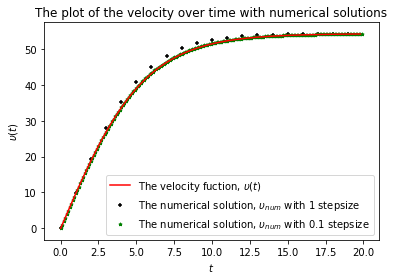

In [4]:

import matplotlib.pyplot as plt
m=60 #the parachutist's mass, in kg
g=9.80665 #the conventional value of gravitational acceleration
b=.2 #the drag coefficient, in kg/m
#Let's import numpy for array manipulation
import numpy as np

t=np.arange(0,20,.2)

def func_vel(time,m,b):
    return ((m*g/b)**.5*np.tanh((g*b/m)**.5*time))
plt.plot(t,func_vel(t,m,b),c='r',label=r'The velocity fuction, $\upsilon(t)$')
t=np.arange(0,20,1)
plt.scatter(t,euler_1(m,b,g),c='k',s=10,marker="+",label=r'The numerical solution, $\upsilon_{num}$ with 1 stepsize')
t=np.arange(0,20,.1)
plt.title("The plot of the velocity over time with numerical solutions")
plt.scatter(t,euler_01(m,b,g),c='green',s=10,marker="*",label=r'The numerical solution, $\upsilon_{num}$ with 0.1 stepsize')
plt.ylabel(r"$\upsilon (t)$")
plt.xlabel(r"$t$")
plt.legend()
plt.show()

Since many everyday differential equations cannot be solved analytically, the need of numerical methods arises. In this task, the comparison of analytical and numerical solutions has been made. The methods used are Euler's method and forward difference approximation. Euler's method gives approximate numerical solution using slope of the function. To calculate the slope, the forward difference approximation was used, and though forward difference is not the best approximation method, it gives quite close approximation to the real, exact solution.